Project 02 - Fraud Detection - Jupyter Tribe/ML C - Hari
## Explore Data set

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

def load (path):
    df = pd.read_csv(path)
    return df

file_path = "/content/sample_data/fraudTest.csv"

df = load (file_path)

df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
df['is_fraud'].value_counts()

,count
is_fraud,
0,553574
1,2145


In [ ]:
def check_nulls(df):
 return df.isnull().sum()

print("Null values in each column:\n")
print(check_nulls(df))

Null values in each column:

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


### keterangan kolom :
Kolom pada dataset - Project 2 - Fraud Detection

Terdapat 23 Kolom :

1. trans_date_trans_time:
Waktu transaksi. Dapat digunakan untuk mendeteksi pola waktu (misal transaksi yang sering terjadi pada waktu yang tidak wajar bisa dicurigai sebagai fraud).

2. cc_num:
Nomor kartu kredit. Informasi penting terkait pengguna kartu, tetapi tidak langsung membantu mendeteksi fraud kecuali ada pola dari penggunaan kartu yang tidak biasa.

3. merchant:
Nama merchant (penjual). Merchant tertentu mungkin lebih sering terlibat dalam transaksi fraud, sehingga bisa membantu mendeteksi risiko terkait merchant.

4. category:
Kategori transaksi. Fraud mungkin lebih sering terjadi dalam kategori tertentu seperti barang mewah atau hiburan, yang memiliki nilai transaksi lebih tinggi.

5. amt:
Jumlah uang dalam transaksi. Nilai transaksi yang sangat besar atau tidak sesuai dengan pola belanja biasanya bisa menjadi tanda fraud.

6. first:
Nama depan pemegang kartu. Tidak terlalu relevan dalam mendeteksi fraud secara langsung.

7. last:
Nama belakang pemegang kartu. Sama seperti first, tidak relevan secara langsung.

8. gender:
Jenis kelamin pemegang kartu. Bisa digunakan untuk melihat pola demografis terkait fraud, meskipun tidak secara langsung mengindikasikan fraud.

9. street:
Alamat jalan pemegang kartu. Dapat digunakan dalam deteksi anomali jika lokasi transaksi berbeda jauh dari alamat pemegang kartu.

10. city:
Kota pemegang kartu. Sama seperti street, dapat digunakan untuk memeriksa ketidaksesuaian antara lokasi pemegang kartu dan transaksi.

11. state:
Negara bagian pemegang kartu. Sama dengan city, bisa mendeteksi anomali lokasi.

12. zip:
Kode pos pemegang kartu. Sama dengan city dan state, bisa membantu mendeteksi anomali geografis.

13. lat:
Garis lintang lokasi pemegang kartu. Lokasi geografis dapat membantu mendeteksi ketidaksesuaian jika dibandingkan dengan lokasi transaksi.

14. long:
Garis bujur lokasi pemegang kartu. Sama dengan lat, membantu mendeteksi lokasi.

15. city_pop:
Populasi kota pemegang kartu. Bisa digunakan untuk memahami risiko terkait daerah, misalnya daerah padat penduduk mungkin memiliki lebih banyak transaksi dan risiko.

16. job:
Pekerjaan pemegang kartu. Pekerjaan dengan penghasilan tinggi mungkin lebih rentan terhadap fraud karena lebih sering terlibat dalam transaksi besar.

17. dob:
Tanggal lahir pemegang kartu. Usia pemegang kartu bisa menjadi faktor, misalnya kelompok usia tertentu mungkin lebih rentan terhadap fraud.

18. trans_num:
ID unik untuk transaksi. Tidak relevan dalam deteksi fraud secara langsung.

19. unix_time:
Waktu transaksi dalam format unix. Sama seperti trans_date_trans_time, membantu dalam menganalisis pola waktu.

20. merch_lat:
Garis lintang merchant. Dapat digunakan untuk mendeteksi ketidaksesuaian antara lokasi merchant dan pemegang kartu.

21. merch_long:
Garis bujur merchant. Sama seperti merch_lat, membantu mendeteksi anomali lokasi.

22. is_fraud:
Label apakah transaksi adalah fraud (0 = tidak fraud, 1 = fraud). Ini adalah target yang perlu diprediksi.

In [ ]:
def drop_columns(df):

    cols_to_drop = ["Unnamed: 0", "trans_num", "cc_num", "unix_time", "first", "last"]
    df = df.drop(columns=cols_to_drop, errors="ignore")
    return df

df = drop_columns(df)
print("Columns dropped successfully!")

Columns dropped successfully!


In [ ]:
def extract_time_features(df):

    # Convert to datetime if not already
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

    # Hour of the day (0–23)
    df['hour'] = df['trans_date_trans_time'].dt.hour

    # Day of the week (0 = Monday, 6 = Sunday)
    df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek

    # Weekend flag (1 = weekend, 0 = weekday)
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

    # Month (1–12)
    df['month'] = df['trans_date_trans_time'].dt.month

    return df

df = extract_time_features(df)
print(df[['trans_date_trans_time', 'hour', 'day_of_week', 'is_weekend', 'month']].head())

  trans_date_trans_time  hour  day_of_week  is_weekend  month
0   2020-06-21 12:14:25    12            6           1      6
1   2020-06-21 12:14:33    12            6           1      6
2   2020-06-21 12:14:53    12            6           1      6
3   2020-06-21 12:15:15    12            6           1      6
4   2020-06-21 12:15:17    12            6           1      6


In [ ]:
def extract_age(df, reference_date=None):

    # Convert to datetime
    df['dob'] = pd.to_datetime(df['dob'], errors='coerce')

    if reference_date is None:
        reference_date = pd.to_datetime(df['trans_date_trans_time']).max()
    else:
        reference_date = pd.to_datetime(reference_date)

    df['age'] = reference_date.year - df['dob'].dt.year

    mask = ( (reference_date.month < df['dob'].dt.month) |
             ((reference_date.month == df['dob'].dt.month) & (reference_date.day < df['dob'].dt.day)) )
    df.loc[mask, 'age'] = df.loc[mask, 'age'] - 1


    df = df.drop(columns=['dob'], errors="ignore")

    return df


df = extract_age(df)
print(df[['age']].head())

   age
0   52
1   30
2   50
3   33
4   65


In [ ]:
def add_distance_feature(df):

    # Convert degrees to radians
    lat1 = np.radians(df['lat'])
    lon1 = np.radians(df['long'])
    lat2 = np.radians(df['merch_lat'])
    lon2 = np.radians(df['merch_long'])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    # Earth radius ~6371 km
    df['distance_km'] = 6371 * c

    return df

df = add_distance_feature(df)
df[['lat', 'long', 'merch_lat', 'merch_long', 'distance_km']].head()

,lat,long,merch_lat,merch_long,distance_km
0,33.9659,-80.9355,33.986391,-81.200714,24.561462
1,40.3207,-110.4360,39.450498,-109.960431,104.925092
2,40.6729,-73.5365,40.495810,-74.196111,59.080078
3,28.5697,-80.8191,28.812398,-80.883061,27.698567
4,44.2529,-85.0170,44.959148,-85.884734,104.335106


In [ ]:
def encode_features(df):

    for col in ['city', 'state', 'zip', 'job', 'merchant','street']:
        if col in df.columns:
            freq = df[col].value_counts()
            df[col + '_freq_enc'] = df[col].map(freq)
            df = df.drop(columns=[col])
    return df

df = encode_features(df)
df.head()

,trans_date_trans_time,category,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud,...,is_weekend,month,age,distance_km,city_freq_enc,state_freq_enc,zip_freq_enc,job_freq_enc,merchant_freq_enc,street_freq_enc
0,2020-06-21 12:14:25,personal_care,2.86,M,33.9659,-80.9355,333497,33.986391,-81.200714,0,...,1,6,52,24.561462,640,12541,640,2430,736,640
1,2020-06-21 12:14:33,personal_care,29.84,F,40.3207,-110.4360,302,39.450498,-109.960431,0,...,1,6,30,104.925092,837,4658,837,2535,785,837
2,2020-06-21 12:14:53,health_fitness,41.28,F,40.6729,-73.5365,34496,40.495810,-74.196111,0,...,1,6,50,59.080078,1073,35918,1073,2587,755,1073
3,2020-06-21 12:15:15,misc_pos,60.05,M,28.5697,-80.8191,54767,28.812398,-80.883061,0,...,1,6,33,27.698567,663,18104,663,663,711,663
4,2020-06-21 12:15:17,travel,3.19,M,44.2529,-85.0170,1126,44.959148,-85.884734,0,...,1,6,65,104.335106,891,19671,891,891,370,891


In [ ]:
def one_hot_encode_category(df):

    if 'category' in df.columns:
        dummies = pd.get_dummies(df['category'], prefix='cat')
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(columns=['category'])
    return df

df = one_hot_encode_category(df)
print("done")

done


In [ ]:
def encode_gender(df):

    if 'gender' in df.columns:
        df['gender_enc'] = df['gender'].map({'M': 0, 'F': 1})
        df = df.drop(columns=['gender'])
    return df

df = encode_gender(df)
print(df[['gender_enc']].head())

   gender_enc
0           0
1           1
2           1
3           0
4           0


In [ ]:
def detect_outliers_iqr(df, column):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outliers, low, high = detect_outliers_iqr(df, "amt")
print(f"Outliers detected: {len(outliers)}")
outliers.head()

Outliers detected: 27778


,trans_date_trans_time,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,hour,day_of_week,...,cat_health_fitness,cat_home,cat_kids_pets,cat_misc_net,cat_misc_pos,cat_personal_care,cat_shopping_net,cat_shopping_pos,cat_travel,gender_enc
33,2020-06-21 12:26:23,210.36,42.9207,-91.0685,878,42.736666,-90.099710,0,12,6,...,False,False,False,False,False,False,False,False,False,1
100,2020-06-21 12:45:48,242.35,40.0897,-74.9781,1526206,39.151823,-75.035003,0,12,6,...,True,False,False,False,False,False,False,False,False,1
133,2020-06-21 12:55:19,558.03,30.2510,-92.5002,1261,30.870870,-92.873036,0,12,6,...,False,False,False,False,False,False,False,False,True,0
167,2020-06-21 13:08:46,1199.45,34.2651,-77.8670,186140,34.622777,-77.827863,0,13,6,...,False,False,False,False,False,False,True,False,False,1
245,2020-06-21 13:36:21,236.15,34.6689,-86.2296,3395,33.831991,-85.328265,0,13,6,...,False,False,False,False,False,False,True,False,False,0


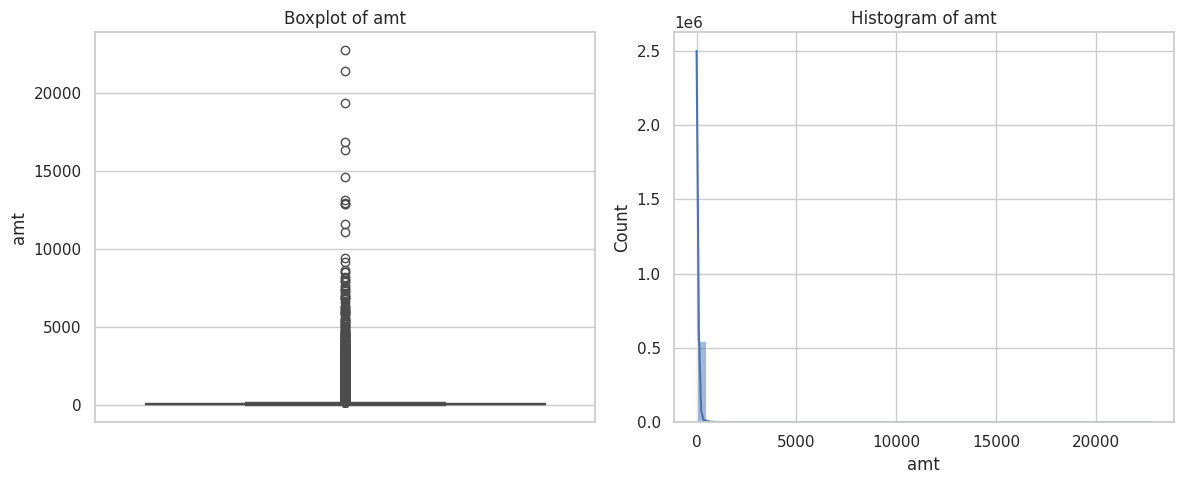

In [ ]:
def plot_outliers(df, column):

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Boxplot
    sns.boxplot(y=df[column], ax=axes[0])
    axes[0].set_title(f"Boxplot of {column}")

    # Histogram
    sns.histplot(df[column], bins=50, kde=True, ax=axes[1])
    axes[1].set_title(f"Histogram of {column}")

    plt.tight_layout()
    plt.show()

# Example usage
plot_outliers(df, "amt")

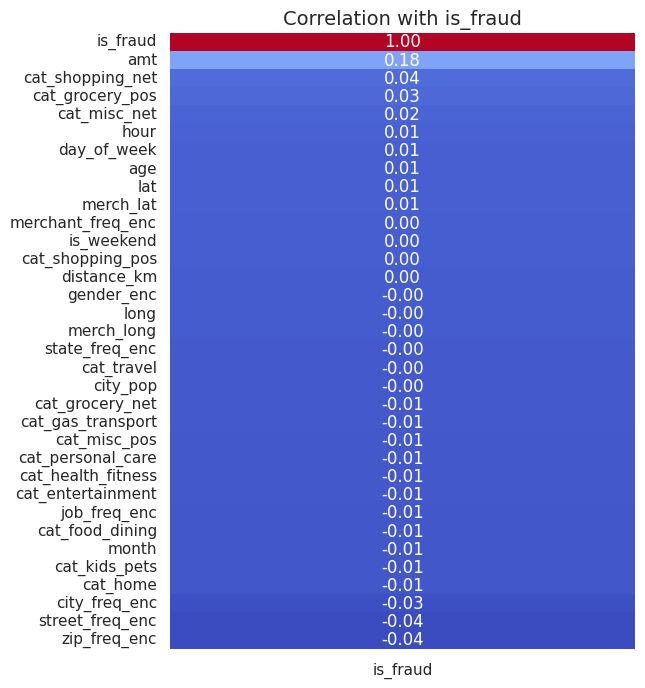

                    is_fraud
is_fraud            1.000000
amt                 0.182267
cat_shopping_net    0.037941
cat_grocery_pos     0.027982
cat_misc_net        0.021642
hour                0.011686
day_of_week         0.009365
age                 0.007513
lat                 0.005863
merch_lat           0.005812
merchant_freq_enc   0.003277
is_weekend          0.002606
cat_shopping_pos    0.002115
distance_km         0.000233
gender_enc         -0.000748
long               -0.000972
merch_long         -0.001060
state_freq_enc     -0.004513
cat_travel         -0.004551
city_pop           -0.004910
cat_grocery_net    -0.005369
cat_gas_transport  -0.006112
cat_misc_pos       -0.007383
cat_personal_care  -0.009257
cat_health_fitness -0.010468
cat_entertainment  -0.010743
job_freq_enc       -0.011015
cat_food_dining    -0.011049
month              -0.011748
cat_kids_pets      -0.012619
cat_home           -0.013417
city_freq_enc      -0.028534
street_freq_enc    -0.038545
zip_freq_enc  

In [ ]:
def fraud_target_correlation(df, target_col="is_fraud"):

    corr = df.corr(numeric_only=True)[[target_col]].sort_values(by=target_col, ascending=False)

    # Plot heatmap
    plt.figure(figsize=(6, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=False)
    plt.title(f"Correlation with {target_col}", fontsize=14)
    plt.show()

    return corr

fraud_corr = fraud_target_correlation(df, target_col="is_fraud")
print(fraud_corr)

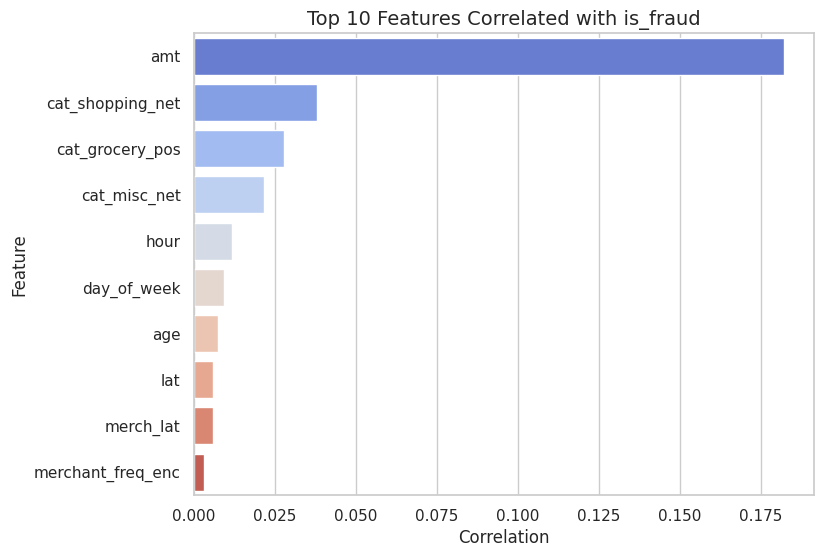

In [ ]:
def plot_top_corr_with_fraud(corr_df, target_col="is_fraud", top_n=10):

    # Drop target itself
    corr_sorted = corr_df.drop(index=target_col).sort_values(by=target_col, ascending=False)

    # Top N features
    top_features = corr_sorted.head(top_n)

    # Barplot
    plt.figure(figsize=(8, 6))
    sns.barplot(x=top_features[target_col], y=top_features.index, palette="coolwarm")
    plt.title(f"Top {top_n} Features Correlated with {target_col}", fontsize=14)
    plt.xlabel("Correlation")
    plt.ylabel("Feature")
    plt.show()

# Example usage
# fraud_corr = fraud_target_correlation(df, target_col="is_fraud")
plot_top_corr_with_fraud(fraud_corr, target_col="is_fraud", top_n=10)

In [ ]:
def drop_trans_date_trans_time(df):

    cols_to_drop = ["trans_date_trans_time"]
    df = df.drop(columns=cols_to_drop, errors="ignore")
    return df

df = drop_trans_date_trans_time(df)
print("Dropped successfully!")

Dropped successfully!


In [ ]:
def scale_numerical_features(df, num_cols):

    df_scaled = df.copy()
    scaler = StandardScaler()

    # Only scale columns that exist in df
    cols_to_scale = [col for col in num_cols if col in df_scaled.columns]

    df_scaled[cols_to_scale] = scaler.fit_transform(df_scaled[cols_to_scale])

    return df_scaled, scaler

num_cols = [
    'amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long',
    'is_weekend', 'distance_km', 'city_freq_enc', 'state_freq_enc',
    'zip_freq_enc', 'job_freq_enc', 'merchant_freq_enc', 'street_freq_enc',
    'gender_enc'
]

df_scaled, scaler = scale_numerical_features(df, num_cols)

df_scaled[num_cols].head()

,amt,lat,long,city_pop,merch_lat,merch_long,is_weekend,distance_km,city_freq_enc,state_freq_enc,zip_freq_enc,job_freq_enc,merchant_freq_enc,street_freq_enc,gender_enc
0,-0.424463,-0.904377,0.677451,0.816521,-0.894145,0.657586,1.605239,-1.770215,-0.567595,-0.462269,-0.465392,0.856146,-0.622497,-0.437280,-1.102494
1,-0.252337,0.351182,-1.472454,-0.292685,0.178126,-1.436610,1.605239,0.989805,-0.113225,-1.185721,0.126009,0.977695,-0.406216,0.171606,0.907034
2,-0.179353,0.420768,1.216667,-0.178853,0.383257,1.167640,1.605239,-0.584703,0.431096,1.683126,0.834489,1.037891,-0.538633,0.901033,0.907034
3,-0.059605,-1.970539,0.685934,-0.111371,-1.909485,0.680717,1.605239,-1.662474,-0.514546,0.048268,-0.396345,-1.189353,-0.732844,-0.366192,-1.102494
4,-0.422358,1.128092,0.380004,-0.289942,1.259139,0.316510,1.605239,0.969542,0.011323,0.192078,0.288119,-0.925417,-2.237981,0.338509,-1.102494


In [ ]:
from sklearn.model_selection import train_test_split

def stratified_train_test_split(df, target_col="is_fraud", test_size=0.2, random_state=42):

    X = df.drop(columns=[target_col])
    y = df[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )

    return X_train, X_test, y_train, y_test

# Example usage
# df = pd.read_csv("fraud_dataset.csv")
X_train, X_test, y_train, y_test = stratified_train_test_split(df, target_col="is_fraud")

print("Train shape:", X_train.shape, " Test shape:", X_test.shape)
print("Fraud ratio in Train:", y_train.mean())
print("Fraud ratio in Test:", y_test.mean())

Train shape: (444575, 33)  Test shape: (111144, 33)
Fraud ratio in Train: 0.003859866164314233
Fraud ratio in Test: 0.003859857482185273


# ML Modelling

In [ ]:
def train_logistic_regression(df, target_col="is_fraud", test_size=0.2, random_state=42):

    # Split dataset
    X = df.drop(columns=[target_col])
    y = df[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )

    # Logistic Regression with balanced weights
    model = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=random_state)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Metrics
    auc = roc_auc_score(y_test, y_proba)
    f1 = f1_score(y_test, y_pred)

    print("Classification Report:\n", classification_report(y_test, y_pred))
    print(f"ROC-AUC: {auc:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    return model

# Train logistic regression
log_reg_model = train_logistic_regression(df, target_col="is_fraud")

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    110715
           1       0.05      0.74      0.09       429

    accuracy                           0.94    111144
   macro avg       0.52      0.84      0.53    111144
weighted avg       1.00      0.94      0.97    111144

ROC-AUC: 0.8644
F1-Score: 0.0927

Confusion Matrix:
 [[104582   6133]
 [   110    319]]


In [ ]:
def train_xgboost(df, target_col="is_fraud", test_size=0.2, random_state=42):

    # Split dataset
    X = df.drop(columns=[target_col])
    y = df[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )

    # Calculate imbalance ratio
    scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

    # XGBoost model
    model = XGBClassifier(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=scale_pos_weight,  # handle imbalance
        eval_metric="logloss",
        use_label_encoder=False,
        random_state=random_state,
        n_jobs=-1
    )

    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Metrics
    auc = roc_auc_score(y_test, y_proba)
    f1 = f1_score(y_test, y_pred)

    print("=== XGBoost Performance ===")
    print("ROC-AUC:", round(auc, 4))
    print("F1-Score:", round(f1, 4))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    return model

xgb_model = train_xgboost(df_scaled, target_col="is_fraud")

=== XGBoost Performance ===
ROC-AUC: 0.9991
F1-Score: 0.8065

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.71      0.93      0.81       429

    accuracy                           1.00    111144
   macro avg       0.86      0.97      0.90    111144
weighted avg       1.00      1.00      1.00    111144


Confusion Matrix:
 [[110552    163]
 [    29    400]]


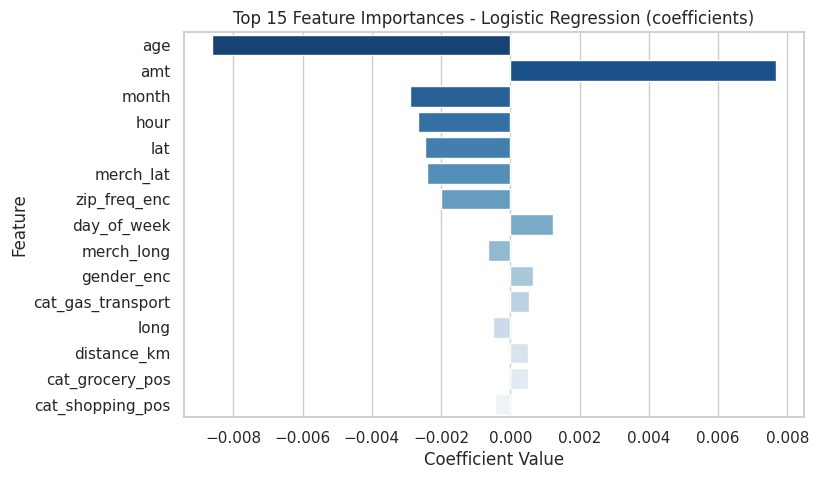

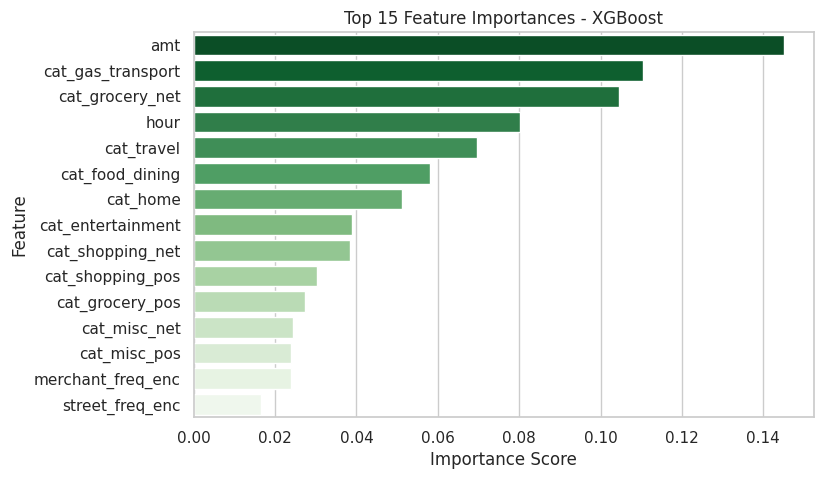

In [ ]:
def plot_feature_importance(X_train, y_train):
    # Logistic Regression
    log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
    log_reg.fit(X_train, y_train)

    coef_importance = pd.Series(log_reg.coef_[0], index=X_train.columns)
    coef_importance = coef_importance.sort_values(key=abs, ascending=False)

    plt.figure(figsize=(8, 5))
    sns.barplot(x=coef_importance.values[:15], y=coef_importance.index[:15], palette="Blues_r")
    plt.title("Top 15 Feature Importances - Logistic Regression (coefficients)")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.show()

    # XGBoost
    xgb = XGBClassifier(
        n_estimators=200, learning_rate=0.1, max_depth=6,
        subsample=0.8, colsample_bytree=0.8,
        random_state=42, use_label_encoder=False,
        eval_metric="logloss",
        scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1])
    )
    xgb.fit(X_train, y_train)

    xgb_importance = pd.Series(xgb.feature_importances_, index=X_train.columns)
    xgb_importance = xgb_importance.sort_values(ascending=False)

    plt.figure(figsize=(8, 5))
    sns.barplot(x=xgb_importance.values[:15], y=xgb_importance.index[:15], palette="Greens_r")
    plt.title("Top 15 Feature Importances - XGBoost")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.show()

plot_feature_importance(X_train, y_train)

In [ ]:
def train_logistic_xgb(X_train, X_test, y_train, y_test):
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, class_weight="balanced"),
        "XGBoost": XGBClassifier(
            n_estimators=200, learning_rate=0.1, max_depth=6,
            subsample=0.8, colsample_bytree=0.8,
            random_state=42, use_label_encoder=False,
            eval_metric="logloss",
            scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1])
        )
    }

    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        results.append({
            "Model": name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1-Score": f1_score(y_test, y_pred),
            "Confusion Matrix": confusion_matrix(y_test, y_pred)
        })

    return pd.DataFrame(results)

comparison_table = train_logistic_xgb(X_train, X_test, y_train, y_test)
print(comparison_table)

                 Model  Accuracy  Precision    Recall  F1-Score  \
0  Logistic Regression  0.943830   0.049442  0.743590  0.092719   
1              XGBoost  0.997139   0.579173  0.946387  0.718584   

               Confusion Matrix  
0  [[104582, 6133], [110, 319]]  
1    [[110420, 295], [23, 406]]  
